<a href="https://colab.research.google.com/github/edabezek/MachineLearning/blob/main/UkCarAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataFrame= pd.read_excel("merc.xlsx")

In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame.isnull()

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [ ]:
dataFrame.isnull().sum()  

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


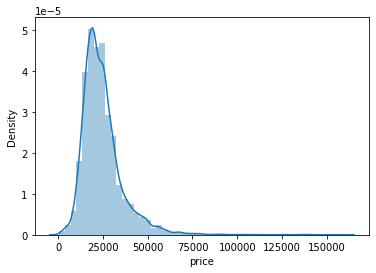

In [ ]:
sbn.distplot(dataFrame["price"]) #distrubition plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


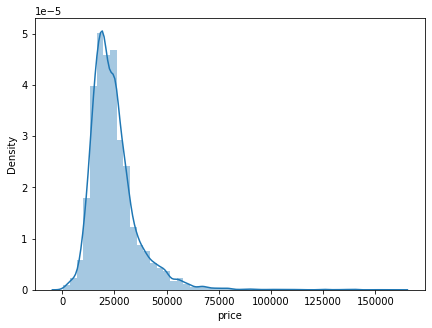

In [ ]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])

not: bu grafikte birkaç araba çok pahalı gözüküyor, fiyatlarımızı etkilememesi için bu pahalı arabaları çıkarıp analiz yapacağız.fakat çıkarmadanki halinin analizi yapılıp da hangi model iyi bakılmalı.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


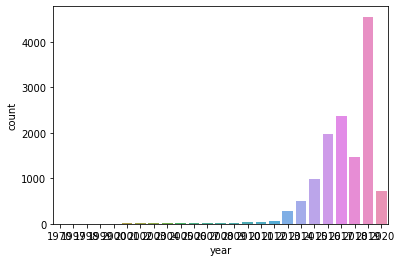

In [ ]:
sbn.countplot(dataFrame["year"])

In [ ]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
dataFrame.corr()["price"].sort_values() #sort value küçükten büyüğe sırala

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

fıyatı etkileyen en çok yıl gibi gözüküyor,
tax / year / engineSize fiyatı pozitif yönde etkiliyor.yani artışları fiyatı etkiliyor.mileperg mil basına ne kadar yol yaptığı fiyatı negatif etkiliyor, mileage de öyle.

#en yüksek fiyatlı arabalar


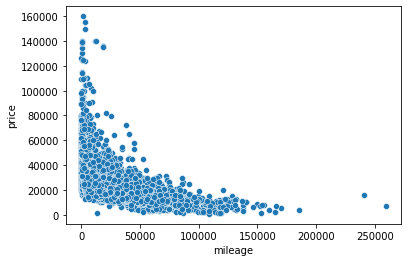

In [ ]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

km arttıkça fiyat hızla düşüyor

In [ ]:
dataFrame.sort_values("price",ascending=False) #en yüksek fiyatı en yukarıda getirecek.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [ ]:
dataFrame.sort_values("price",ascending=True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [ ]:
len(dataFrame)

13119

In [ ]:
len(dataFrame)*0.01  #verinin yüzde birini atacağız.(en pahalı arabaları)

131.19

#veri temizliği

In [ ]:
#iloc : indexe göre locate et
dataFrame.sort_values("price",ascending=False).iloc[131:] #burda 131.den sonraki listeyi getirecek

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [ ]:
yuzdeDoksanDokuzDF= dataFrame.sort_values("price",ascending=False).iloc[131:]

In [ ]:
yuzdeDoksanDokuzDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


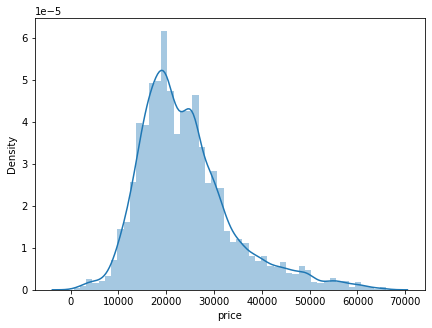

In [ ]:
plt.figure(figsize=(7,5))
sbn.distplot(yuzdeDoksanDokuzDF["price"])

In [ ]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

1970 arabası ortalama 24999.000000 fiyata satılmış.(1970 de satılan arabanın fiyatı 2017 ile yakın garip bir durum.) 1970i çıkarmalıyız.


In [ ]:
yuzdeDoksanDokuzDF.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

düzelttiğimiz veride de durum aynı 1970 i çıkaracağız.

In [ ]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

dataFrame ile yuzde doksandokuzluk veri eşitleyecegız

In [ ]:
dataFrame=yuzdeDoksanDokuzDF

In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame= dataFrame[dataFrame.year != 1970]

In [ ]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


burada gereksiz transmission kolonu var (katogorik değişken),atarsak

In [ ]:
dataFrame=dataFrame.drop("transmission",axis=1)  #iki defa çalıştırdıgımdan hata verdi o değişken yok diye 
#bu fonksiyon ile transmission kolonunu sildik.

In [ ]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


#model oluşturmak

In [ ]:
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values 

In [ ]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [ ]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
len(x_train)

9090

In [ ]:
len(x_test)

3897

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test= scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(9090, 5)

not: bir değişken attık ,toplam 7 tane vardı 6 kaldı.fiyat değişkenini de y'ye aldık. katmanları 5 den başlatsak iyi olur,ama istemezsek ekleyebiliriz.  

In [ ]:
model= Sequential()

model.add(Dense(12,activation="relu")) #katman ekledik, dense katmanı 12 oldu.
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1)) #çıkış katmanı

model.compile(optimizer= "adam",loss="mse")

#model eğitim

not:validasyon=doğrulama
batch size = modele datayı parti parti verecek anlamında

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 6ms/step - loss: 672146944.0000 - val_loss: 688107264.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672133760.0000 - val_loss: 688087232.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672097792.0000 - val_loss: 688022912.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671983360.0000 - val_loss: 687827520.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 671659904.0000 - val_loss: 687309440.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 670859968.0000 - val_loss: 686092672.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 669102144.0000 - val_loss: 683567040.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 665626304.0000 - val_loss: 678700160.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6590723

#sonuç

In [ ]:
kayıpVerisi=pd.DataFrame(model.history.history)

In [ ]:
kayıpVerisi.head()

,loss,val_loss
0,672146944.0,688107264.0
1,672133760.0,688087232.0
2,672097792.0,688022912.0
3,671983360.0,687827520.0
4,671659904.0,687309440.0


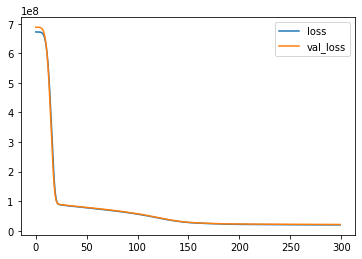

In [ ]:
kayıpVerisi.plot()

1. grafik azalmalı (evet azalıyor)
2.kayıp ve dogrulama kaydı birlikte hareket ediyor mu(yes)
3.epoch u çok fazla verirsek 500/1000..  overfitting olur(yani nöronlar esas problemi çözmek yerine şuanki veri setine en uygun agırlıgı bulmmaya çalışıyorlar.bunu istemiyoruz geleceği tahmin etmek amacımız. o yuzden grafıkte loss ve validation lossun bir yerde ayrıldığını görüyorsak overfitting var demektir.val aşagı gider loss yukarı,epoch azaltılmalı.yada modeli baştan kurmalı)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
tahminDizisi = model.predict(x_test)

In [ ]:
tahminDizisi  #fiyatlar (ytest içerisinde dogru karşılıklar var)

array([[22511.14 ],
       [23755.273],
       [24853.883],
       ...,
       [26186.8  ],
       [11139.992],
       [24700.186]], dtype=float32)

In [ ]:
mean_absolute_error(y_test,tahminDizisi)

3251.312658876219

In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


ortalama fiyat 24bin paund diyelim, bu fiyattan 3200paund sapabiliriz ve  3200/24000=0.13 neredeyse yuzde 13 lük bir fark var. bu fark kabul edilebilir mi kişiye kalmış.

Napabiliriz : geri dönüp veriyi daha fazla temizleyebiliriz,test size yada split size değiştirebilliriz,epocks u arttırabiliriz,nöron sayısını değiştirebiliriz, katman sayısını değiştirebiliriz.

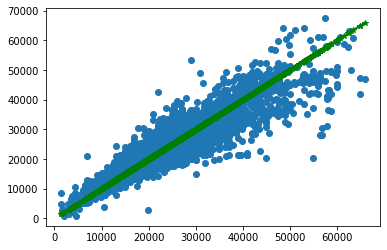

In [ ]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

görüldüğü gibi çok normal ötesi bir durum yok,birkaç sapma var

In [ ]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [ ]:
dataFrame.iloc[2] #3.elemanı getirir.

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [ ]:
yeniArabaSeries= dataFrame.drop("price",axis=1).iloc[2]  #3.elemanı çıkarıyoruz.

In [ ]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [ ]:
yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [ ]:
model.predict(yeniArabaSeries)

array([[61728.65]], dtype=float32)

veri setinden çıkartarak aldıgımız 65bin paunda satılmış arabayı,61bin paund bulduk.bu deger yakın bir deger.